In [107]:
educacion = pd.read_csv("../datos reales/años_esperados_educación.csv")
educacion = educacion[educacion["Disaggregation"]=="total"]
educacion = educacion.drop(["Indicator Name","Indicator Code", "Country Name", "Disaggregation"], axis=1).pivot(index="Country Code",columns="Year", values="Value")

In [147]:
educacion.reset_index()

,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,4.799,4.808,4.892,4.915,5.125,5.333,5.462,5.561,5.681,...,9.509,9.417,9.464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,2.579,2.706,2.798,2.866,3.004,2.998,3.113,3.218,3.351,...,10.465,NaN,NaN,NaN,10.538,NaN,NaN,NaN,NaN,NaN
3,AFW,3.290,3.372,3.532,3.647,3.693,3.746,3.823,4.206,4.782,...,8.874,8.892,8.698,8.701,8.709,NaN,NaN,NaN,NaN,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,WSM,8.820,NaN,NaN,9.176,NaN,10.208,NaN,10.456,10.535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.282,14.606,14.245,14.265,14.081,14.214,13.983,14.114,NaN,NaN
250,ZMB,6.600,NaN,NaN,NaN,7.116,7.086,7.315,7.303,7.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
educacion[1970]

Country Code
ABW      NaN
AFE    4.799
AFG    2.579
AFW    3.290
AGO      NaN
       ...  
WSM    8.820
YEM      NaN
ZAF      NaN
ZMB    6.600
ZWE      NaN
Name: 1970, Length: 252, dtype: float64

In [144]:
percentiles_ingresos["year"].astype(str)

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
245587    2019
245588    2019
245589    2019
245590    2019
245591    2019
Name: year, Length: 245592, dtype: object

{'2007', '2013', '2012', '1995', '1997', '2023', '1979', '1966', '2002', '2003', '2014', '1992', '1988', '2019', '1982', '1990', '1999', '1969', '1965', '1974', '2016', '2009', '1991', '1996', '1976', '1987', '1968', '1980', '2015', '1993', '2006', '1970', '1964', '2018', '1978', '1984', '1977', '2005', '1994', '2011', '1985', '2021', '1983', '1986', '1967', '2020', '1973', '2001', '1975', '2017', '1998', '2000', '2008', '1971', '2022', '1989', '1972', '2010', '1981', '1963', '2004'}
{'2007', '2013', 'Country Code', '2012', '1995', '1997', '2023', '1979', '2002', '2003', '2014', '1992', '1988', '1982', '1990', '2019', '1999', '1974', '2016', '2009', '1991', '1996', '1976', '1987', '1980', '2015', '1993', '2006', '1970', '2018', '1978', '1984', '1977', '2005', '1989', '1994', '2011', '1985', '2021', '1983', '1986', '2020', '1973', '2001', '1975', '1998', '2017', '1972', '2000', '2008', '2022', '1971', '2010', '1981', '2004'}
{'2007', '2013', '2012', '1995', '1997', '2023', '1979', '2002

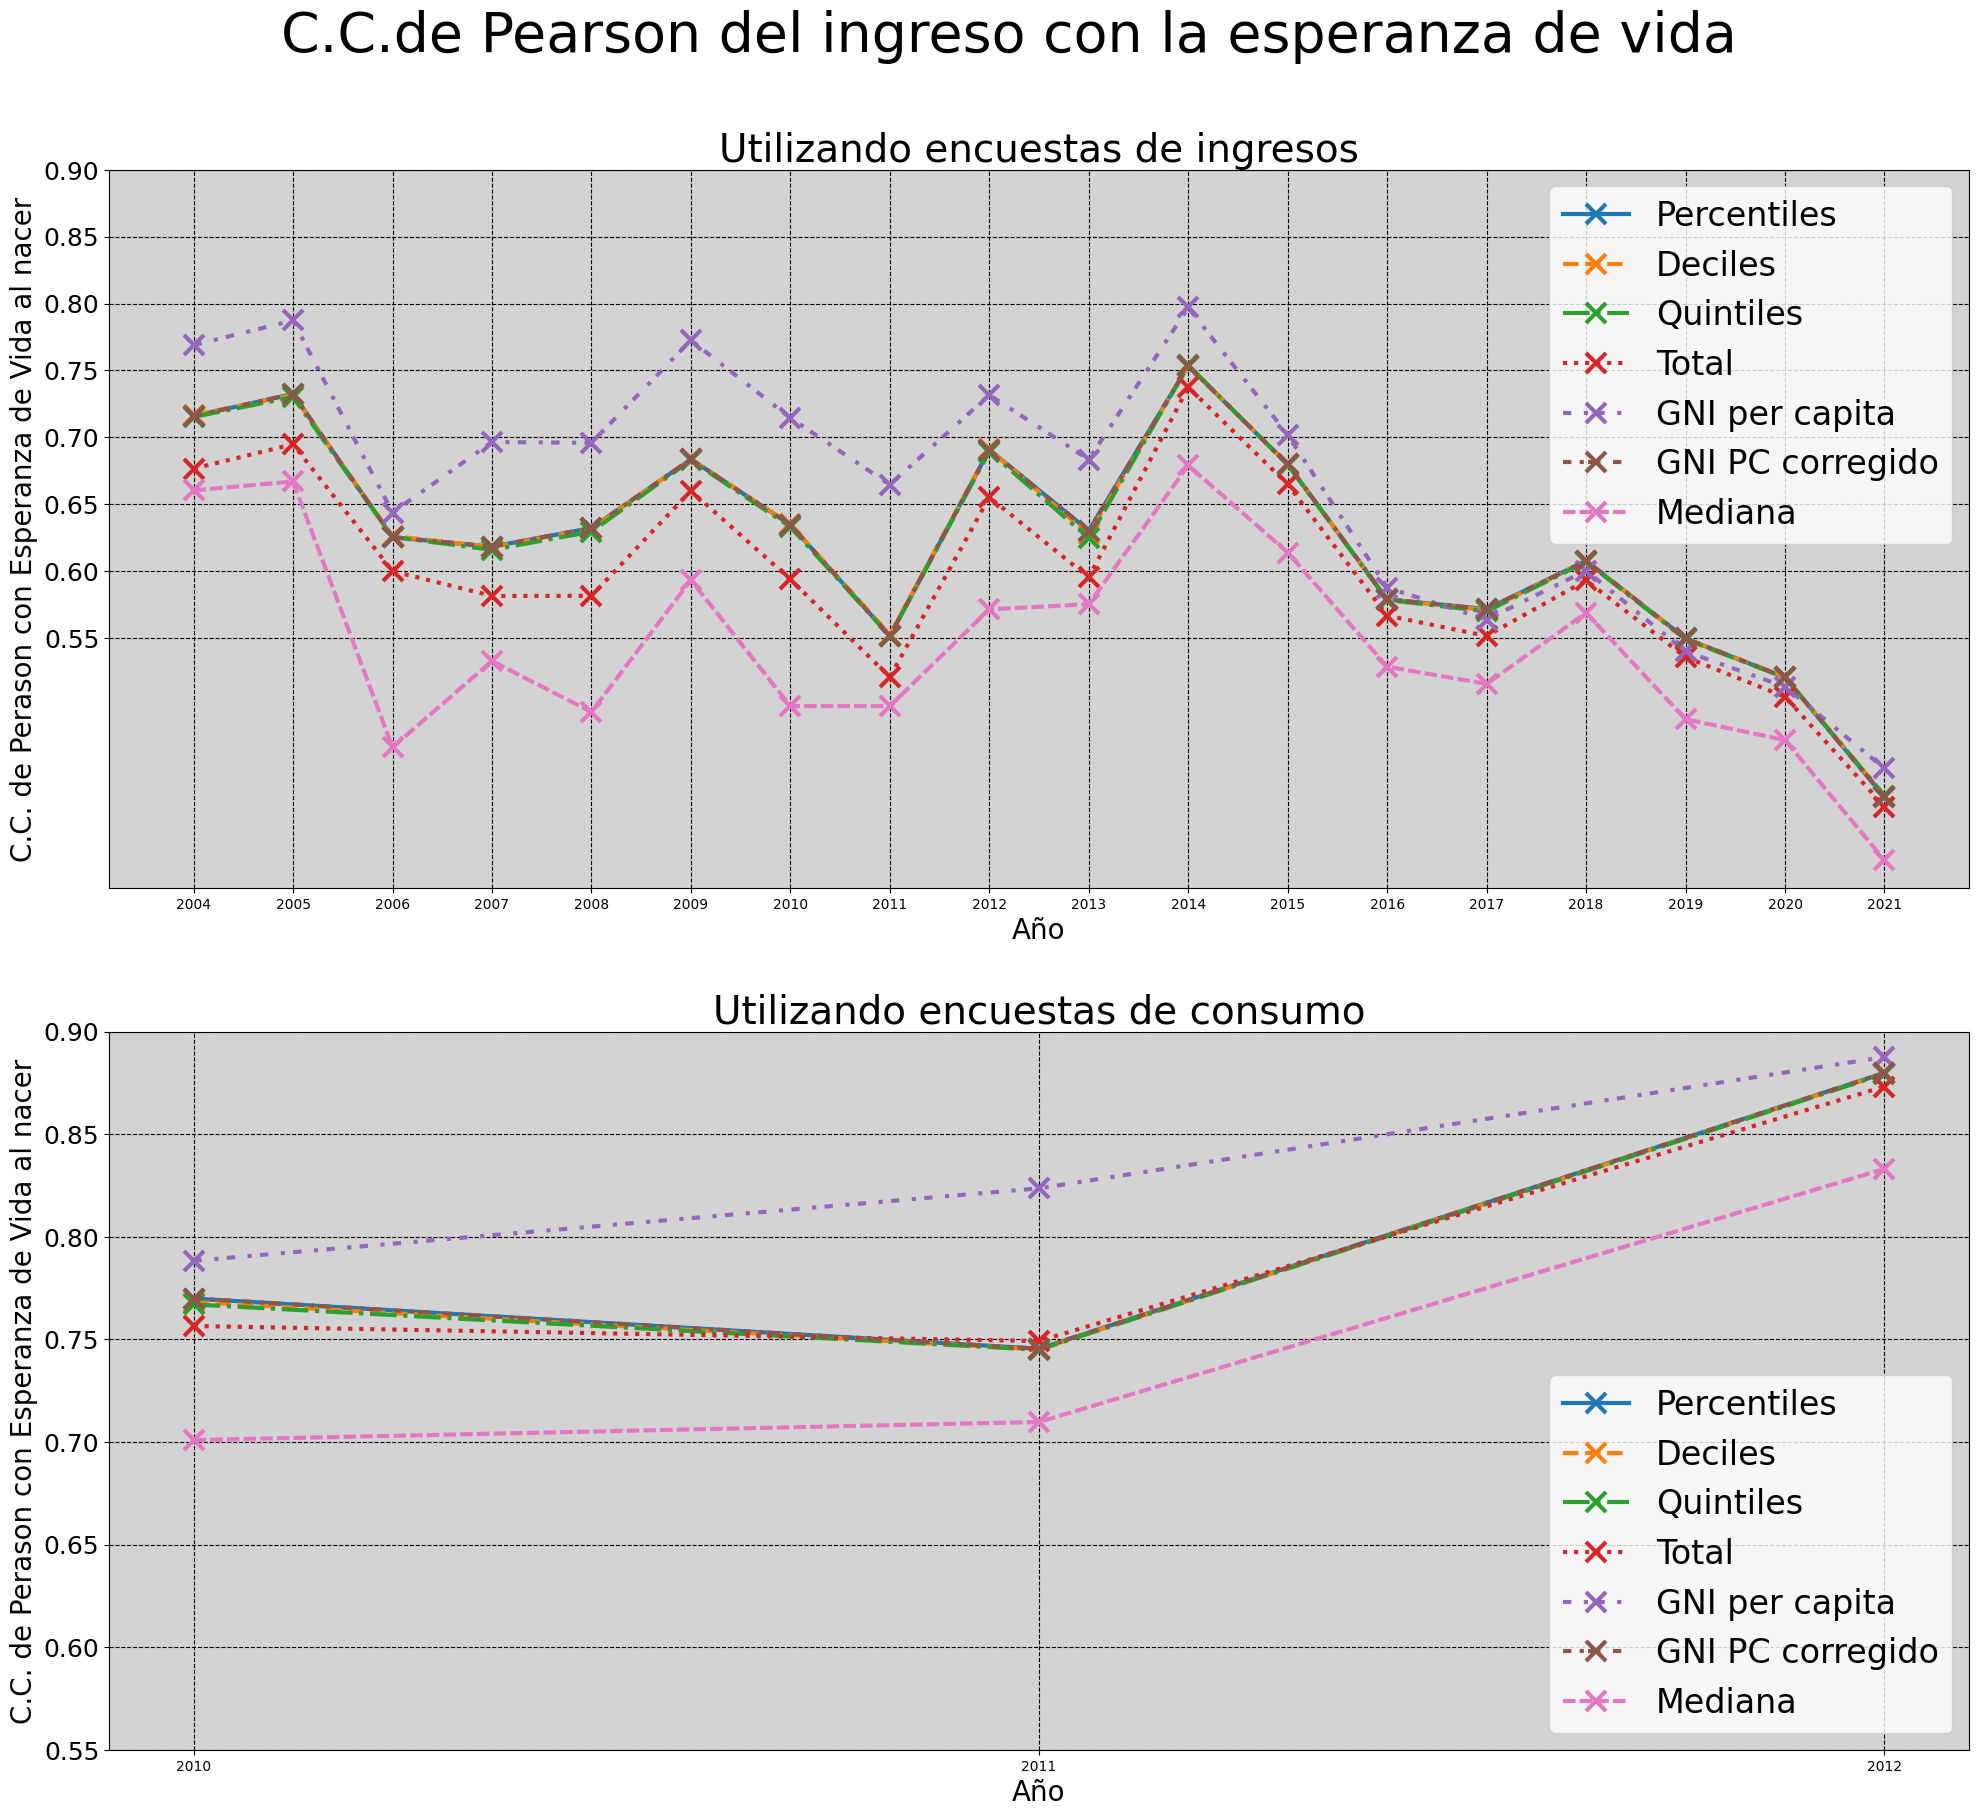

In [148]:
# from general import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

def Cambiar(s : str):
    if s[-1]==']': return s[:4]
    return s

educacion = pd.read_csv("../datos reales/años_esperados_educación.csv")
educacion = educacion[educacion["Disaggregation"]=="total"]
educacion = educacion.drop(["Indicator Name","Indicator Code", "Country Name", "Disaggregation"], axis=1).pivot(index="Country Code",columns="Year", values="Value")
educacion.columns = list(map(str, educacion.columns))
educacion.reset_index(inplace=True)

gni_ppa = pd.read_csv("../datos reales/gni_ppa_2021_per_capita.csv")
gni_ppa.columns = list(map(Cambiar, gni_ppa.columns))
gni_ppa[gni_ppa=='..'] = pd.NA

percentiles_ingresos = pd.read_csv("../datos reales/percentiles_ingresos_PPA_2011.csv")
percentiles_ingresos["year"] = percentiles_ingresos["year"].astype(str)


def Sintetizador(tam = 100):
    def Sintesis(ingresos):
        sintesis = 0
        for ini in range(0,100,tam):
            rango = ingresos.iloc[ini:(ini+tam)]
            peso = np.sum(rango['pop_share'])
            avg_rango = np.sum(rango['avg_welfare'] * rango['pop_share'])/peso
            sintesis += np.log(avg_rango)*peso
        return sintesis
    return Sintesis

def GenerarMuestra(datos_originales, umbral):
    muestras = dict()
    years = set(datos_originales["year"]).intersection(educacion.columns)
    print(set(datos_originales["year"]))
    print(set(educacion.columns))
    print(years)
    for year in sorted(years):
        #try:
            datos_anio = datos_originales[datos_originales['year']==year]
            paises = datos_anio['country_code'].unique()
            
            paises = list(filter(lambda x : 
                sum(datos_anio['country_code']==x)==100, paises
            ))
            edu = educacion[~ educacion[str(year)].isna()]
            paises = set(paises).intersection(edu['Country Code'].unique())
            paises = list(paises) 

            gni = gni_ppa[~gni_ppa[str(year)].isna()]
            paises = set(paises).intersection(gni['Country Code'].unique())
            paises = list(paises) 
        
            if len(paises) < umbral: continue
            
            grupos_in = datos_anio.groupby('country_code')
            
            muestras[year] = []
            
            edu.set_index('Country Code', inplace=True)
            gni.set_index('Country Code', inplace=True)

            for country in paises:
                tams = (1,10,20,100)
                muestra = []
                for (i,tam) in enumerate(tams):
                    muestra.append(Sintetizador(tam)(grupos_in.get_group(country)))
                muestra.append(np.log(float(gni.loc[country][str(year)])))
                
                A = np.exp(muestra[0]-muestra[-1])
                muestra.append(np.log(float(gni.loc[country][str(year)]) * A))

                muestra.append(np.quantile(grupos_in.get_group(country)['avg_welfare'], q=0.5))
                muestras[year].append((country,muestra, edu.loc[country][str(year)]))
        #except Exception as e:
        #    print(e.with_traceback()) 
        #    pass 
    return muestras

percentiles_ingresos_ni = percentiles_ingresos[
    np.array(percentiles_ingresos['welfare_type']=='income') &
    np.array(percentiles_ingresos['reporting_level']=='national')
]

percentiles_ingresos_comp = percentiles_ingresos[
    np.array(percentiles_ingresos['welfare_type']=='consumption') &
    np.array(percentiles_ingresos['reporting_level']=='national')
]

muestras_ingreso = GenerarMuestra(percentiles_ingresos_ni,20)
muestras_consumo = GenerarMuestra(percentiles_ingresos_comp,20)

print(muestras_ingreso)

fig, axs = plt.subplots(2,1, figsize=(24,20))
fig.subplots_adjust(top=0.90) 
fig.suptitle('C.C.de Pearson del ingreso con la esperanza de vida', fontsize=40)

muestras = [muestras_ingreso, muestras_consumo]
nombres_m = ["ingresos","consumo"]
nombres =  ["Percentiles","Deciles","Quintiles","Total", "GNI per capita", "GNI PC corregido", "Mediana"]
estilos =  ['-','--','-.',':', (0,(2,3,1,2)), (0,(2,2,1,1,3,3)), (0,(3,1))]

xticks = list(range(1994,2022))
xlabel_ticks = list(map(str, xticks))

yticks_mayor = np.linspace(0.55,0.9,8)
yticks_menor = np.linspace(0.55,0.9,15)

def GenerarSeries(muestras, metrica):
    xs = list(sorted(muestras.keys()))
    ys = []
    for x in xs:
        muestra = muestras[x]
        series = []
        for i in range(len(muestra[0][1])):
            a = [float(item[1][i]) for item in muestra]
            b = [float(item[2]) for item in muestra]
            series.append(metrica(a,b))
        ys.append(tuple(series))
    return xs,ys

for (ax,muestra,nombre_muestra) in zip(axs,muestras,nombres_m):
    xs, ys = GenerarSeries(muestra, lambda x,y : np.corrcoef(x,y)[0,1])
    for (i, nombre, estilo) in zip(range(len(nombres)),nombres,estilos):
        ax.plot(xs,[y[i] for y in ys], label = nombre, linestyle=estilo, marker='x', linewidth=3, markersize = 15, markeredgewidth=3)
    
    ax.set_ylabel("C.C. de Perason con Esperanza de Vida al nacer", fontsize=20)
    ax.set_xlabel("Año", fontsize=20)
    ax.set_title(f"Utilizando encuestas de {nombre_muestra}", fontsize = 28)
    #ax.set_xticks(ticks = xticks, labels= xlabel_ticks, rotation=90, fontsize=18)
    # ax.set_xticks(ticks = xticks, labels=[None]*len(xticks))
    ax.set_yticks(ticks = yticks_mayor, minor=False, labels=list(map(lambda x: f"{x:.2f}", yticks_mayor)), fontsize=18)
    # ax.set_yticks(ticks = yticks_menor, labels=("" for _ in yticks_menor), linestyle=(0,(2,1)), minor=True)
    ax.grid(c='black', linestyle='--')
    ax.set_facecolor('lightgray')
    ax.legend(fontsize=24)


# fig.savefig("../figuras/figura_19_empirico_todas_metricas_vs_evn_pearson.png",bbox_inches='tight')